- The data of bullet subtitles disclose the directly reflects the audience's real-time viewing experience.
- The data of comments reflects the evaluation and feedback of andience's on the whole party. 

## Comments

In [172]:
import pandas as pd

dfPL = pd.read_csv('comment.csv', encoding= "gbk")
dfPL.drop_duplicates(inplace=True)
print(len(dfPL))
dfPL.head()
# dfPL['Message']

15368


,User,Gender,Level,Message
0,学嘛不好非要学医,保密,5,我可能很难再看到这样一场方方面面都合乎我心意的晚会了。\n除了b站春晚和明年跨年(？)\n我...
1,皮沙发great,保密,4,各位，这个晚会让哔哩哔哩股价上升了近两个百分点，真是流弊
2,踩雨的粽子,女,4,主持人：朱广权，陈超\n第一篇章『日落』\n1.欢迎回到 艾泽拉斯 O-DO...
3,浙江共青团,保密,6,新年快乐！[2020]
4,孤独终殇,男,5,秒审核可还行


- User: The sender of comment
- Gender: The sender of the sender
- Level: The level of sender's account
- Message: The content of the comment. 

## Bullet subtitiles

In [173]:
import pandas as pd

df = pd.read_csv('bullet subtitles.csv')
df.drop_duplicates(inplace=True)
print(len(df))
df.head()

71898


,Date,Chapter,VideoTime,SenderId,DanMuContent
0,2020-01-01,1,3547.541,ee7c0146,我不管你们的嘲笑了，我祖安人请求出战！
1,2020-01-01,1,3228.318,f89a8128,就冲这一首
2,2020-01-01,1,1676.286,c08912dd,大过年的提什么青霉素啊
3,2020-01-01,1,2822.630,91fc2f45,啊啊啊啊啊啊啊啊啊啊啊啊啊
4,2020-01-01,1,3397.162,ccde1dd6,哇~


- Date：All the data from 201912.31 to 2019. 01. 03
- Chapter: There are three chapters of this party, each chapter is about 69 mins. 
- VideoTime: The time of the bullet subtitle was sent corresponding to the party
- SenderId: The encoded ID of sender
- DanMuContent: The content of bullet subtitle.

# Data pre-processing of Bullet Subtitles


In [174]:
def str2float(string):
    #将VideoTime从字符串变为浮点数
    try: 
        return float(string)
    except:
        return 0.0

df['VideoTime'] = df['VideoTime'].apply(str2float)
print('Chapter 1', df[df['Chapter']==1]['VideoTime'].max())
print('Chapter 2', df[df['Chapter']==2]['VideoTime'].max())
print('Chapter 3', df[df['Chapter']==3]['VideoTime'].max())

Chapter 1 4253.188
Chapter 2 4000.27
Chapter 3 4555.0


To do the distribution of bullet subtitles according to the time, we have to make three chapters on one time line. 

In [175]:
chapter1 = df[df['Chapter']==1]
chapter2 = df[df['Chapter']==2]
chapter3 = df[df['Chapter']==3]

# make three chapters on one time line.
chapter2['VideoTime'] = chapter2['VideoTime']+ 4253.188
chapter3['VideoTime'] = chapter3['VideoTime']+ 4253.188 + 4000.27

#Merge chapter1， chapter2， chapter3
chapter = pd.concat([chapter1, chapter2, chapter3])
#VideoTime in ascending order.
chapter.sort_values(by='VideoTime', ascending=True, inplace=True)
chapter

/Users/ataii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ataii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Date,Chapter,VideoTime,SenderId,DanMuContent
4100,2020-01-01,1,0.000,78a691dd,明年求犬夜叉啊啊啊啊啊啊
4036,2020-01-01,1,0.000,cad1ef83,这是假唱吗
20413,2020-01-03,1,0.000,6278460a,为了部落
17636,2020-01-03,1,0.000,c73fd96,补课补课
8594,2020-01-02,1,0.000,9bc2a0c5,假唱？
9208,2020-01-02,1,0.000,9bc2a0c5,背景是蹦迪了？
19686,2020-01-03,1,0.000,b83cfa92,为了艾泽拉斯
20234,2020-01-03,1,0.000,66a0a76e,头皮发麻
3313,2020-01-01,1,0.216,4959872f,慕名前來
6877,2020-01-01,1,0.446,1ffc7e93,CC


# df2


In [176]:
def second2minute(second):
    #将VideoTime从秒数变为分钟数
    try:
        return int(float(second)/60)
    except:
        return 0


chapter['VideoTime'] = chapter['VideoTime'].apply(second2minute)
chapter

,Date,Chapter,VideoTime,SenderId,DanMuContent
4100,2020-01-01,1,0,78a691dd,明年求犬夜叉啊啊啊啊啊啊
4036,2020-01-01,1,0,cad1ef83,这是假唱吗
20413,2020-01-03,1,0,6278460a,为了部落
17636,2020-01-03,1,0,c73fd96,补课补课
8594,2020-01-02,1,0,9bc2a0c5,假唱？
9208,2020-01-02,1,0,9bc2a0c5,背景是蹦迪了？
19686,2020-01-03,1,0,b83cfa92,为了艾泽拉斯
20234,2020-01-03,1,0,66a0a76e,头皮发麻
3313,2020-01-01,1,0,4959872f,慕名前來
6877,2020-01-01,1,0,1ffc7e93,CC


# df3

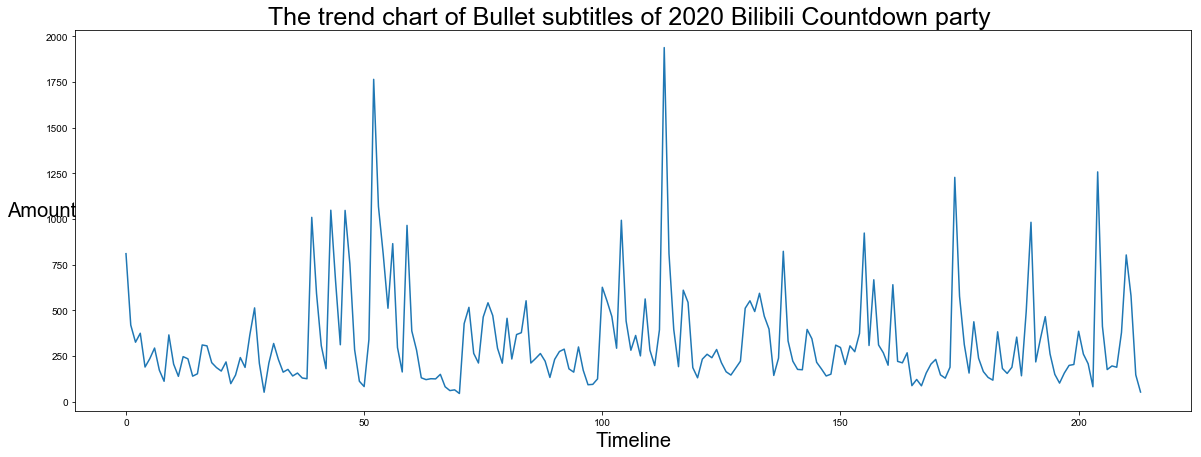

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
danmudf = chapter.groupby('VideoTime').agg({'DanMuContent': ['count']})
danmudf.plot(kind='line', figsize=(20, 7), legend=False)
plt.title("The trend chart of Bullet subtitles of 2020 Bilibili Countdown party ", fontweight='bold', fontsize=25)
plt.xlabel('Timeline', fontweight='bold', fontsize=20)
plt.ylabel('Amount', fontweight='bold', fontsize=20, rotation=0)
plt.show()

From the above figure, it can be seen that the relatively concentrated interval of the amount of bullet subtitles sent by users is:
- (37, 63) 
- (100, 120)


### Textmining of Bullet Subtitles

In [178]:
import re
import jieba
import csv
import jieba
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType


In [179]:
len(chapter['DanMuContent'])

71898

In [180]:
text = ' · '.join(df['DanMuContent'])

In [181]:
Danmu = text.split(' · ')

In [182]:
with open('/Users/ataii/Desktop/Bilibili Countdown Party/中文停用词整理(含标点符号和数字)的副本.txt', 'r', encoding='utf-8') as f:
    stop_text = f.read()
    textlist = stop_text.split(';\n')
    zn_STOPWORDS = set(textlist)

In [183]:
len(textlist)

1894

In [184]:
tokenized_list = list(jieba.lcut(text))

In [186]:
stopwords = {}.fromkeys(textlist)


final_tokenize = []
for word in tokenized_list:
    if word not in stopwords:
            final_tokenize.append(word)


In [187]:
len(final_tokenize)

178676

In [188]:
words={}
#统计词频
for word in final_tokenize:
    if(word in words):
        words[word]=words[word]+1
    else:
        words[word]=1

In [189]:
sortedWords = sorted(words.items(), key=lambda d: d[1], reverse=True)

In [190]:
top200 = sortedWords[0:200]

In [191]:
keywords = []
for i in range(200):
    keywords.append(top200[i][0])

In [192]:
keywords

['啊啊啊',
 '哔哩',
 '卧槽',
 '报道',
 '哈哈哈',
 '干杯',
 '站',
 '红',
 '款待',
 '多谢',
 '吸吸',
 '牛',
 '逼',
 '2020',
 '新年快乐',
 '乾杯',
 '兔',
 '好听',
 '兔子',
 '补课',
 '⚡',
 '真的',
 'ロ',
 '哭',
 '中国',
 '哈哈哈哈',
 '爱',
 '弹幕',
 '此生',
 '年',
 'B',
 '听',
 'bilibili',
 '吸',
 '小破',
 '华夏',
 '镜像',
 '前来',
 '种花',
 '家',
 'b',
 '想',
 '入',
 '唱',
 '无悔',
 '下次',
 '厉害',
 '号',
 '云飞兄',
 '说',
 '感觉',
 '喜欢',
 '排面',
 '新',
 '现场',
 '1.25',
 '死',
 '加油',
 '红红',
 '人才',
 '五月天',
 '真',
 '鬼畜',
 '晚会',
 '老师',
 '️',
 '报',
 '点',
 '笑',
 '教主',
 '倍',
 '哇哇',
 '鸡皮疙瘩',
 '走',
 '我要',
 '部落',
 '上头',
 '春晚',
 '上岸',
 '脱单',
 '希望',
 '区',
 '明年',
 '握草',
 '裤子',
 '泪目',
 '天',
 '可爱',
 '童年',
 '这是',
 '好看',
 '成功',
 '好好',
 '内味',
 '学院',
 '高能',
 '跪',
 '逮虾',
 '0.5',
 '户',
 '信仰',
 '顺利',
 '起立',
 '大学',
 '万岁',
 '变色',
 '来世',
 '前方',
 '360',
 '请',
 '我为歌狂',
 '1.5',
 '倍速',
 '歌',
 '末',
 '回忆',
 '首歌',
 '炸',
 '快乐',
 '电光',
 '看过',
 '身体健康',
 '深深',
 '声音',
 '谢谢',
 '西亚',
 '味儿',
 '变',
 'nb',
 '指尖',
 '吃',
 '德玛',
 '大师',
 '冲冲',
 '太棒了',
 '不错',
 '考试',
 '360p',
 '真相',
 '回来',
 '牛壁',
 '家人',
 '错过',
 '手动',
 

From the keywords, with disregard of the tremendous interjection, we can see a lot of acclaimation words have high frequency, such as ['牛逼', '哭', '无悔', '成功', '上头','泪目','好看', '高能']. 

### Textmining of Comments

In [193]:
comment = ' · '.join(dfPL['Message'])
comment_list = comment.split(' · ')
tokenized_comment = list(jieba.lcut(comment))

In [194]:
stopwords = {}.fromkeys(textlist)
#停用词有待添加

final_tokenize_comment = []
for word in tokenized_comment:
    if word not in stopwords:
            final_tokenize_comment.append(word)

len(final_tokenize_comment)

109948

In [195]:
words={}
Keywords_Of_Comment = {}

for word in final_tokenize_comment:
    if(word in Keywords_Of_Comment):
        Keywords_Of_Comment[word]=Keywords_Of_Comment[word]+1
    else:
        Keywords_Of_Comment[word]=1     

In [196]:
SortedWordsComment = sorted(Keywords_Of_Comment.items(), key=lambda d: d[1], reverse=True)


In [197]:
top200_Comment = SortedWordsComment[0:200]

keywordsComment = []
for i in range(200):
    keywordsComment.append(top200_Comment[i][0])
    
for word in keywordsComment:
    if word == '\n' or word == 'b' or word == 'B' or word == '站' :
        keywordsComment.remove(word)

In [199]:
keywordsComment

['晚会',
 '2020',
 '哔哩',
 '真的',
 '小破',
 '新年快乐',
 '年',
 'call',
 '喜欢',
 '跨',
 '啊啊啊',
 '干杯',
 '爱',
 '牛',
 '逼',
 '大哭',
 '说',
 'bilibili',
 '跨年',
 '想',
 '卫视',
 '哭',
 '好看',
 '直播',
 '太棒了',
 '感觉',
 '节目',
 'doge',
 '希望',
 '明年',
 '电视',
 '春晚',
 '乾杯',
 '加油',
 '完',
 '越来越',
 '弹幕',
 '五月天',
 '现场',
 '新',
 '祝',
 '笑',
 '老师',
 '一年',
 '拜年',
 '夜',
 '微笑',
 '2233',
 '娘',
 '最美',
 '祭',
 'ロ',
 '错过',
 '期待',
 '棒',
 '昨晚',
 '惊喜',
 '请',
 'nb',
 '厉害',
 '快乐',
 '感动',
 '二零一九',
 '爱心',
 '喜极而泣',
 '昨天',
 '感谢',
 '邓紫棋',
 '支持',
 '第一次',
 '赞',
 '周深',
 '听',
 '洛天',
 '办',
 '滑稽',
 '永远',
 '哈哈哈',
 '真',
 '吴亦凡',
 '音乐',
 '呜呜',
 '做',
 '吃瓜',
 '大笑',
 '画风',
 '会员',
 '突变',
 '年轻人',
 '唱',
 '谢谢',
 '全程',
 '只能',
 '吹',
 '不错',
 '后悔',
 '文化',
 '明星',
 '爱小破',
 '视频',
 '排面',
 '卧槽',
 '懂',
 '很棒',
 '点',
 '方锦龙',
 '2019',
 '流量',
 '回忆',
 '评论',
 '爱死',
 '天',
 '录播',
 '观众',
 '用心',
 'up',
 'tv',
 '看过',
 '爆',
 '好听',
 '点赞',
 '开心',
 '刷',
 '新年',
 '精彩',
 '我要',
 '元旦',
 '中',
 '舞台',
 '神仙',
 '死',
 '牛批',
 '补课',
 '搞',
 '特别',
 '一句',
 '冯提',
 '青春',
 '看着',
 '高',
 '妙',
 '这才',
 '超级',
 

## Sentiment Score And The Trend of Bullet Subtitiles

In [200]:
import snownlp
from snownlp import SnowNLP

In [201]:
from aip import AipNlp

APP_ID = '19424535'
API_KEY = 'GvidrbPdRTDa6IWRG5iSf2O7'
SECRET_KEY = '92WBQMrAFvh1CMMAS9W9DA6qdtuqhTWM'

client = AipNlp(APP_ID, API_KEY, SECRET_KEY)

In [202]:
test_text = Danmu[1]
result=client.sentimentClassify(test_text)
print(result)

{'log_id': 233108323990269426, 'text': '就冲这一首', 'items': [{'positive_prob': 0.677188, 'confidence': 0.282639, 'negative_prob': 0.322812, 'sentiment': 2}]}


In [203]:
result=client.sentimentClassify(Danmu[5])
print(result)

{'log_id': 7741413730339053234, 'text': '今晚感觉错过了几十亿', 'items': [{'positive_prob': 0.954927, 'confidence': 0.899837, 'negative_prob': 0.0450734, 'sentiment': 2}]}


In [204]:
result=client.sentimentClassify(Danmu[6])
print(result)

{'log_id': 3534326202121870738, 'text': '来了', 'items': [{'positive_prob': 0.918192, 'confidence': 0.818205, 'negative_prob': 0.0818079, 'sentiment': 2}]}


In [205]:
chapter['Sentiment_Score'] = chapter['VideoTime'].apply(second2minute)


In [206]:
rate_list = []

for i in range(len(Danmu)):
    comment = Danmu[i]
    if comment != '' and type(comment) == str:
        s = SnowNLP(comment)
        rates = s.sentiments
        rate_list.append(rates)
        # print(rates)


In [207]:
for i in range(len(Danmu)):
    chapter.loc[i, 'sentiment_Score'] = rate_list[i]

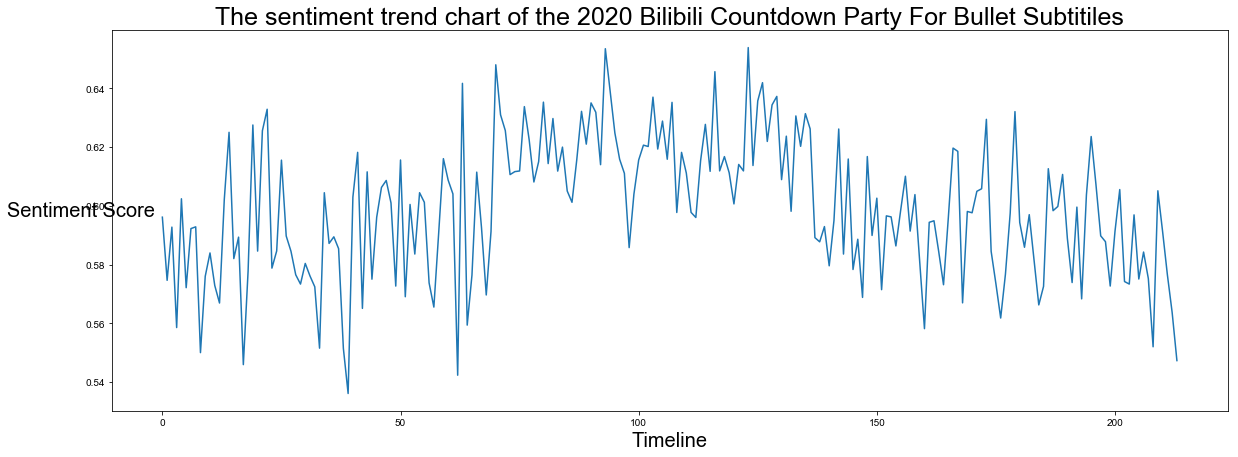

In [208]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
danmudf2 = chapter.groupby('VideoTime').agg({'sentiment_Score': ['mean']})
danmudf2.plot(kind='line', figsize=(20, 7), legend=False)
plt.title("The sentiment trend chart of the 2020 Bilibili Countdown Party For Bullet Subtitiles", fontweight='bold', fontsize=25)
plt.xlabel('Timeline', fontweight='bold', fontsize=20)
plt.ylabel('Sentiment Score', fontweight='bold', fontsize=20, rotation=0)
plt.show()

## Sentiment Score And The Trend of Comments

In [209]:
from aip import AipNlp

APP_ID = '19424535'
API_KEY = 'GvidrbPdRTDa6IWRG5iSf2O7'
SECRET_KEY = '92WBQMrAFvh1CMMAS9W9DA6qdtuqhTWM'

client = AipNlp(APP_ID, API_KEY, SECRET_KEY)

In [210]:
test_text = comment_list[1]
result=client.sentimentClassify(test_text)
print(result)

{'log_id': 1525069105199081682, 'text': '各位，这个晚会让哔哩哔哩股价上升了近两个百分点，真是流弊', 'items': [{'positive_prob': 0.000525256, 'confidence': 0.998833, 'negative_prob': 0.999475, 'sentiment': 0}]}


In [211]:
rate_list_comment = []

for i in range(len(comment_list)):
    comment = comment_list[i]
    if comment != '' and type(comment) == str:
        s = SnowNLP(comment)
        rates = s.sentiments
        rate_list_comment.append(rates)


In [271]:
from numpy import *
mean(rate_list_comment)

0.6365238768181131

In [259]:
for i in range(len(rate_list_comment)):
    dfPL.loc[i, 'sentiment_Score'] = rate_list_comment[i]

In [261]:
for i in range(len(rate_list_comment)):
    dfPL.loc[i, 'Order'] = i

In [269]:
dfPL

,User,Gender,Level,Message,sentiment_Score,Order
0,学嘛不好非要学医,保密,5.0,我可能很难再看到这样一场方方面面都合乎我心意的晚会了。\n除了b站春晚和明年跨年(？)\n我...,1,0.0
1,皮沙发great,保密,4.0,各位，这个晚会让哔哩哔哩股价上升了近两个百分点，真是流弊,0.781818,1.0
2,踩雨的粽子,女,4.0,主持人：朱广权，陈超\n第一篇章『日落』\n1.欢迎回到 艾泽拉斯 O-DO...,1,2.0
3,浙江共青团,保密,6.0,新年快乐！[2020],0.683337,3.0
4,孤独终殇,男,5.0,秒审核可还行,0.228949,4.0
5,取名字太难了_-,保密,5.0,实话实说，第一次晚会办的很好，甚至超过了一些卫视,0.44307,5.0
6,豪田表弟,男,4.0,⑧说了，明年还是看B站跨年比较实在，方锦龙那节目是真尼玛好看，无论是专业歌手还是UP主水平都...,0.990622,6.0
7,JOSEIJI,保密,5.0,“唱的好音乐区，唱不好鬼畜区”笑死我了[喜极而泣][喜极而泣][喜极而泣],0.992979,7.0
8,小犬良,保密,5.0,b站虽然不是最富裕的晚会，但节目选择真的很年轻，热血，向上，审美好且多元。小破站正处在新一轮...,0.999999,8.0
9,小名叫羊驼,保密,5.0,广权哥 你手语老师呢[doge],0.888211,9.0


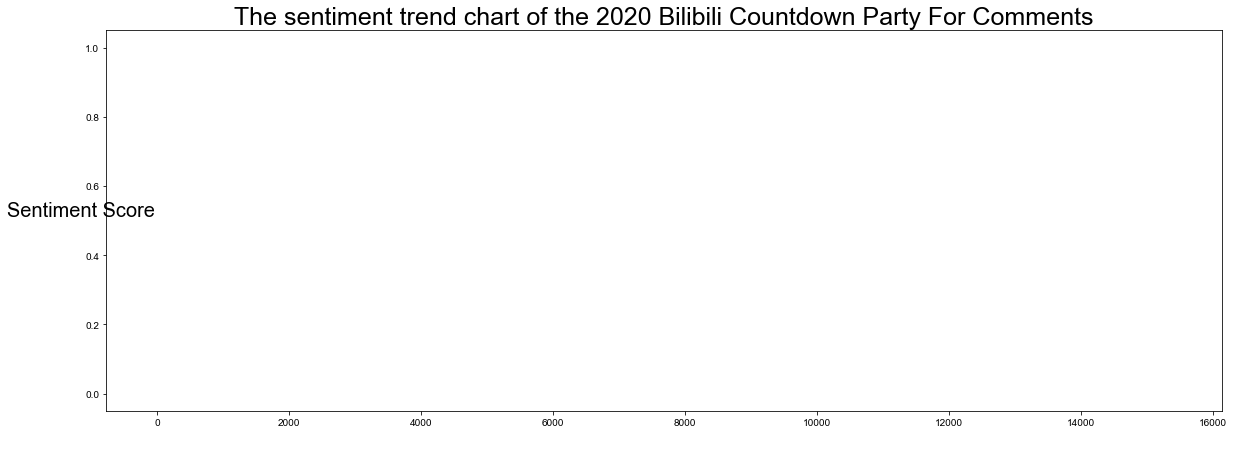

In [268]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
danmudf2 = dfPL.groupby('Order').agg('sentiment_Score')
danmudf2.plot(kind='line', figsize=(20, 7), legend=False)
plt.title("The sentiment trend chart of the 2020 Bilibili Countdown Party For Comments", fontweight='bold', fontsize=25)
plt.xlabel(' ', fontweight='bold', fontsize=20)
plt.ylabel('Sentiment Score', fontweight='bold', fontsize=20, rotation=0)
plt.show()

## WordCloud of Bullet Subtitiles

In [215]:

import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
top200_dict = {}
for i in range(len(top200)):
    top200_dict[top200[i][0]] = top200[i][1]

aaaa = ['啊啊啊', '哈哈哈', '哈哈哈','哈哈哈哈', 'b', 'B', '哇哇']

In [250]:
top200_dict_True = {}
for key in top200_dict:
    if (key in aaaa) != True:
        top200_dict_True[key] = top200_dict[key]


In [274]:
for key in top200_dict_True:
    print(key)

哔哩
卧槽
报道
干杯
站
红
款待
多谢
吸吸
牛
逼
2020
新年快乐
乾杯
兔
好听
兔子
补课
⚡
真的
ロ
哭
中国
爱
弹幕
此生
年
听
bilibili
吸
小破
华夏
镜像
前来
种花
家
想
入
唱
无悔
下次
厉害
号
云飞兄
说
感觉
喜欢
排面
新
现场
1.25
死
加油
红红
人才
五月天
真
鬼畜
晚会
老师
️
报
点
笑
教主
倍
鸡皮疙瘩
走
我要
部落
上头
春晚
上岸
脱单
希望
区
明年
握草
裤子
泪目
天
可爱
童年
这是
好看
成功
好好
内味
学院
高能
跪
逮虾
0.5
户
信仰
顺利
起立
大学
万岁
变色
来世
前方
360
请
我为歌狂
1.5
倍速
歌
末
回忆
首歌
炸
快乐
电光
看过
身体健康
深深
声音
谢谢
西亚
味儿
变
nb
指尖
吃
德玛
大师
冲冲
太棒了
不错
考试
360p
真相
回来
牛壁
家人
错过
手动
河南
跨
跃动
神仙
挺
做
火
嗷嗷
完
直播
兔来
自动
超
我来
音乐
唢呐
666
嗨
山东
懵
魔鬼
噢
考研
拜年
玩
膝盖
联盟
凛冬
闯关东
妈呀
四川
舞台
曹家
进化
帅
月光
艾欧
红色
柯南
卫视
尼亚
❤
祝
别来无恙
广东
鸭
会员
中
好帅
我红
世代
胡彦斌
の
祖国
终于
跨年


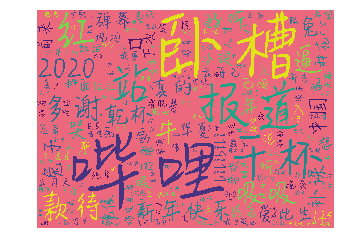

In [252]:
#WordCloud
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image


def draw_cloud(dic):
    image = Image.open('/Users/ataii/Desktop/Bilibili Countdown Party/8612260-d82704afd3c6f21b的副本.jpg')  
    graph = np.array(image)
    Bilibili  = np.array(Image.open('/Users/ataii/Desktop/Bilibili Countdown Party/1188649.png'))
    wc = WordCloud(font_path='/Users/ataii/Desktop/Bilibili Countdown Party/义启燕书秀体.ttf', background_color=(236,104,125),
                   scale=10, 
                   mask=graph, 
                   max_words = 200,
                   max_font_size = 750)
    wc.generate_from_frequencies(dic)  
    image_color = ImageColorGenerator(graph)
    plt.imshow(wc)
    plt.axis("off") 
    plt.show()
    wc.to_file('top_keyword_Danmu.png')

if __name__ == '__main__':
    draw_cloud(top200_dict_True)

## WordCloud of Comment

In [218]:
top200_dict_Comment = {}
for i in range(len(top200_Comment)):
    top200_dict_Comment[top200_Comment[i][0]] = top200_Comment[i][1]

In [255]:
top200_dict_True_Comment = {}
for key in top200_dict_Comment:
    if (key in aaaa) != True and key != '站':
        top200_dict_True_Comment[key] = top200_dict_Comment[key]



In [275]:
for key in top200_dict_True_Comment:
    print(key)

晚会


2020
哔哩
真的
小破
新年快乐
年
call
喜欢
跨
干杯
爱
牛
逼
大哭
说
bilibili
跨年
想
卫视
哭
好看
直播
太棒了
感觉
节目
doge
希望
明年
电视
春晚
乾杯
加油
完
越来越
弹幕
五月天
现场
新
祝
笑
老师
一年
拜年
夜
微笑
2233
娘
最美
祭
ロ
错过
期待
棒
昨晚
惊喜
请
nb
厉害
快乐
感动
二零一九
爱心
喜极而泣
昨天
感谢
邓紫棋
支持
第一次
赞
周深
听
洛天
办
滑稽
永远
真
吴亦凡
音乐
呜呜
做
吃瓜
大笑
画风
会员
突变
年轻人
唱
谢谢
全程
只能
吹
不错
后悔
文化
明星
爱小破
视频
排面
卧槽
懂
很棒
点
方锦龙
2019
流量
回忆
评论
爱死
天
录播
观众
用心
up
tv
看过
爆
好听
点赞
开心
刷
新年
精彩
我要
元旦
中
舞台
神仙
死
牛批
补课
搞
特别
一句
冯提
青春
看着
高
妙
这才
超级
各大
鸭
这是
区
NB
时间
小破站
破站
好多
动漫
挺
歌
中国
太强
跳
偷笑
第一
一场
世界
质量
一点
内容
完美
主持人
调皮
主
地方
太太
更好
激动
优秀
震撼
用户
一遍
再见
这场
主题曲
表演
朋友
未来
款待
几个
问
下次
演唱会
鬼畜
盛宴
理查德
投
太牛
游戏
酸
币


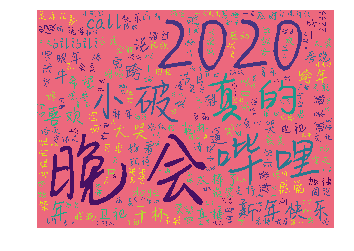

In [256]:
def draw_cloud(dic):
    image = Image.open('/Users/ataii/Desktop/Bilibili Countdown Party/8612260-d82704afd3c6f21b的副本.jpg')  # 作为背景轮廓图
    graph = np.array(image)
    Bilibili  = np.array(Image.open('/Users/ataii/Desktop/Bilibili Countdown Party/1188649.png'))
    wc = WordCloud(font_path='/Users/ataii/Desktop/Bilibili Countdown Party/义启燕书秀体.ttf', background_color=(236,104,125),
                   scale=10, 
                   mask=graph, 
                   max_words = 200,
                   max_font_size = 750)
    wc.generate_from_frequencies(dic)  
    image_color = ImageColorGenerator(graph)
    plt.imshow(wc)
    plt.axis("off")  # 不显示坐标轴
    plt.show()
    wc.to_file('top_keyword_Comment.png')  # 图片命名

if __name__ == '__main__':
    draw_cloud(top200_dict_True_Comment)